Import the Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [5]:
df = pd.read_csv('/content/train_data.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


EDA & Visualization

In [7]:
df.shape

(982644, 9)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982644 entries, 0 to 982643
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          982644 non-null  int64 
 1   DayOfWeek      982644 non-null  int64 
 2   Date           982644 non-null  object
 3   Sales          982644 non-null  int64 
 4   Customers      982644 non-null  int64 
 5   Open           982644 non-null  int64 
 6   Promo          982644 non-null  int64 
 7   StateHoliday   982644 non-null  object
 8   SchoolHoliday  982644 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 67.5+ MB


Checking for Missing Values

In [9]:
df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
#Unique Values
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [11]:
sh={'0':0,'a':1,'b':2,'c':3,0:0}

In [12]:
df['StateHoliday']=df['StateHoliday'].map(sh)

In [13]:
df['SchoolHoliday'].unique()

array([0, 1])

Statistical Info

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,982644.0,558.444843,321.909907,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,982644.0,3.998282,2.000138,1.0,2.0,4.0,6.0,7.0
Sales,982644.0,5760.843202,3857.573443,0.0,3705.0,5731.0,7847.0,41551.0
Customers,982644.0,632.770227,465.401378,0.0,403.0,609.0,838.0,7388.0
Open,982644.0,0.828585,0.376871,0.0,1.0,1.0,1.0,1.0
Promo,982644.0,0.380183,0.485432,0.0,0.0,0.0,1.0,1.0
StateHoliday,982644.0,0.046751,0.288473,0.0,0.0,0.0,0.0,3.0
SchoolHoliday,982644.0,0.171928,0.377318,0.0,0.0,0.0,0.0,1.0


In [15]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


Distribution Plot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


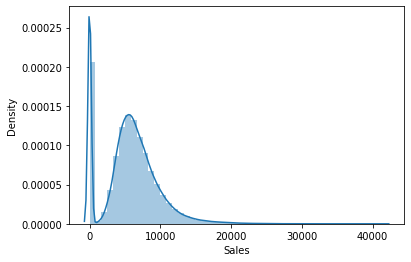

In [16]:
sns.distplot(df['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


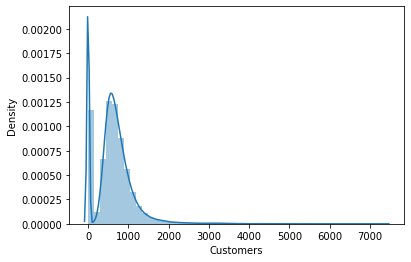

In [17]:
sns.distplot(df['Customers'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


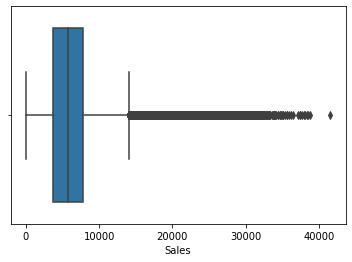

In [18]:
#Boxplots
sns.boxplot(df['Sales'])

Feature Engineering

In [19]:
df['day'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.day
df['month'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.month
df['year'] = pd.to_datetime(df['Date'], format='%Y-%m-%d').dt.year

In [20]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,2,2015-06-30,5735,568,1,1,0,0,30,6,2015
1,2,2,2015-06-30,9863,877,1,1,0,0,30,6,2015
2,3,2,2015-06-30,13261,1072,1,1,0,1,30,6,2015
3,4,2,2015-06-30,13106,1488,1,1,0,0,30,6,2015
4,5,2,2015-06-30,6635,645,1,1,0,0,30,6,2015


In [21]:
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
982639,1111,2,2013-01-01,0,0,0,0,1,1,1,1,2013
982640,1112,2,2013-01-01,0,0,0,0,1,1,1,1,2013
982641,1113,2,2013-01-01,0,0,0,0,1,1,1,1,2013
982642,1114,2,2013-01-01,0,0,0,0,1,1,1,1,2013
982643,1115,2,2013-01-01,0,0,0,0,1,1,1,1,2013


In [22]:
df.drop('Date', axis=1, inplace=True)

In [23]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,day,month,year
0,1,2,5735,568,1,1,0,0,30,6,2015
1,2,2,9863,877,1,1,0,0,30,6,2015
2,3,2,13261,1072,1,1,0,1,30,6,2015
3,4,2,13106,1488,1,1,0,0,30,6,2015
4,5,2,6635,645,1,1,0,0,30,6,2015


In [24]:
df['StateHoliday'].unique().T

array([0, 1, 2, 3])

In [25]:
y=df['Sales']
X=df.drop('Sales', axis=1)

Model Building

In [26]:
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

In [27]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
score_lr=cross_val_score(lr,X,y,cv=5)
print(score_lr)

[0.84717193 0.85335481 0.86065079 0.84283013 0.86439539]


In [28]:
score_lr.mean()

0.8536806084880121

In [29]:
#RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_lr=mean_absolute_error(y_test, pred_lr)
print(mae_lr)
mse_lr=mean_squared_error(y_test, pred_lr)
print(mse_lr)

982.020858425509
2151197.7892146916


In [30]:
# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred_dt=dt.predict(X_test)
score_dt=cross_val_score(dt,X,y,cv=5)
print(score_dt)

[0.91387719 0.89405871 0.92316814 0.89793896 0.92497266]


In [31]:
score_dt.mean()

0.9108031314297674

In [32]:
mae_dt=mean_absolute_error(y_test,pred_dt)
print(mae_dt)
mse_dt=mean_squared_error(y_test,pred_dt)
print(mae_dt)

599.9574250695064
599.9574250695064


In [37]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
pred_regressor=regressor.predict(X_test)
score_regressor=cross_val_score(regressor,X,y,cv=5)
print(score_regressor)

[0.9482199  0.93973864 0.95632794 0.94017779 0.95759346]


In [38]:
score_regressor.mean()

0.9484115458699908

In [39]:
mae_regressor=mean_absolute_error(y_test,pred_regressor)
print(mae_regressor)
mse_regressor=mean_squared_error(y_test,pred_regressor)
print(mae_regressor)

496.2178347397429
496.2178347397429


In [ ]:
# best model is Random forest regressor with accuracy with greater than 95%
